# Imports
Import required libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import sys
import os
import otbApplication
import PIL

# Processing
* expression is muParser mathematical expression to apply on input images
* imNbM is band M from image N

In [2]:
BandMath = otbApplication.Registry.CreateApplication("BandMath")
file1='/eodata/Landsat-5/TM/L1T/2011/07/15/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030.TIFF/LT51900232011196ESA00_B3.TIF'
file2='/eodata/Landsat-5/TM/L1T/2011/07/15/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030.TIFF/LT51900232011196ESA00_B4.TIF'
BandMath.SetParameterStringList("il",[file1,file2])
BandMath.SetParameterString("out","bandmath5.png")
expression = "(im2b1 - im1b1)/(im2b1 + im1b1)"
BandMath.SetParameterString("exp",expression)
BandMath.ExecuteAndWriteOutput()

0

# Display results
Display results using matplotlib.

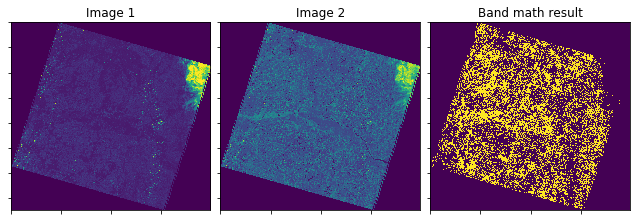

In [3]:
fig = plt.figure(num=1,figsize=(20, 60))

gs1 = gridspec.GridSpec(1, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])


img = plt.imread(file1)
ax1.imshow(img)
ax1.set_title("Image 1")
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

img1 = plt.imread(file2)
ax2.imshow(img1)
ax2.set_title("Image 2")
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())

img2 = plt.imread("bandmath5.png")
ax3.imshow(img2)
ax3.set_title("Band math result")
ax3.xaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

# Display result on map

In [4]:
layer=ImageLayer()
box=layer.getbb('/eodata/Landsat-5/TM/L1T/2011/07/15/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030')
print box
layer.addImageLayer('bandmath5.png', box, 'NDVI-5')
layer.showLayer()

[[52.041900,19.840400],[54.142300,16.418400]]
